In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

# PREPARATION

In [2]:
df = pd.read_csv('bankloan.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [3]:
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [4]:
import statsmodels.api as sm 

x = df[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt']]
y = df['default']

sm_log = sm.Logit(y, sm.add_constant(x))
hasil = sm_log.fit()
print(hasil.summary())


Optimization terminated successfully.
         Current function value: 0.394049
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      691
Method:                           MLE   Df Model:                            8
Date:                Thu, 08 Jun 2023   Pseudo R-squ.:                  0.3142
Time:                        11:44:44   Log-Likelihood:                -275.83
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 4.623e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5536      0.619     -2.509      0.012      -2.767      -0.340
age            0.0344      0.

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    random_state=5,
    stratify= y
)

# LOGISTICS REGRESSION

In [6]:
#Built Model

logReg = LogisticRegression()
logReg.fit(xtrain,ytrain)

LogisticRegression()

In [7]:
print(classification_report(ytest, logReg.predict(xtest)))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       129
           1       0.57      0.46      0.51        46

    accuracy                           0.77       175
   macro avg       0.69      0.67      0.68       175
weighted avg       0.75      0.77      0.76       175



In [9]:
#Built Model 2
from sklearn.svm import SVC

SVM = SVC()
SVM.fit(xtrain,ytrain)

SVC()

In [10]:
print(classification_report(ytest, logReg.predict(xtest)))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       129
           1       0.69      0.20      0.31        46

    accuracy                           0.77       175
   macro avg       0.73      0.58      0.58       175
weighted avg       0.75      0.77      0.71       175



# KNN CLASSIFICATION

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(
    df[['age','employ','income','debtinc','creddebt','othdebt']],
    df['default'],
    train_size=0.8,
    stratify= y,
    random_state=123
)

In [17]:
#Built model KNN (K=3) without scaling.

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
predKNN = knn.predict(xtest)

print(f'Akurasi KNN = {accuracy_score(ytest,predKNN)*100}%')

Akurasi KNN = 78.57142857142857%


In [23]:
#Built model KNN (K=3) with scaling.

scaler = MinMaxScaler()
scaler.fit(xtrain) #.fit() xtrain akan dicoba untuk mempelajari rumus yang ada di scaller
x_train_scaled = scaler.transform(xtrain)
x_test_scaled = scaler.transform(xtest)

knn_sc = KNeighborsClassifier(n_neighbors=3)
knn_sc.fit(x_train_scaled,ytrain)
predKNN_sc = knn_sc.predict(x_test_scaled)

print(f'Akurasi KNN = {accuracy_score(ytest,predKNN_sc)*100}%')

Akurasi KNN = 80.71428571428572%


In [26]:
# Get Best K

k = range(1,36,2)

train_score = []
test_score= []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,ytrain)

    ypred_train = knn.predict(x_train_scaled)
    train_score.append(accuracy_score(ytrain,ypred_train))

    ypred_test = knn.predict(x_test_scaled)
    acc_score = accuracy_score(ytest,ypred_test)
    test_score.append(acc_score)

    if score< acc_score:
        score = acc_score
        best_k = i

print (f'best K = {best_k}')

#train_score

best K = 5


In [38]:
#Final Best Model

knn_scaled = KNeighborsClassifier(n_neighbors=best_k)
knn_scaled.fit(x_train_scaled,ytrain)
predict_knn_scaled = knn_scaled.predict(x_test_scaled)

print(f'KNN Accuracy = {accuracy_score(ytest,predict_knn_scaled)*100}%')
print(classification_report(ytest,predict_knn_scaled))

KNN Accuracy = 83.57142857142857%
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       103
           1       0.85      0.46      0.60        37

    accuracy                           0.84       140
   macro avg       0.84      0.72      0.75       140
weighted avg       0.84      0.84      0.82       140



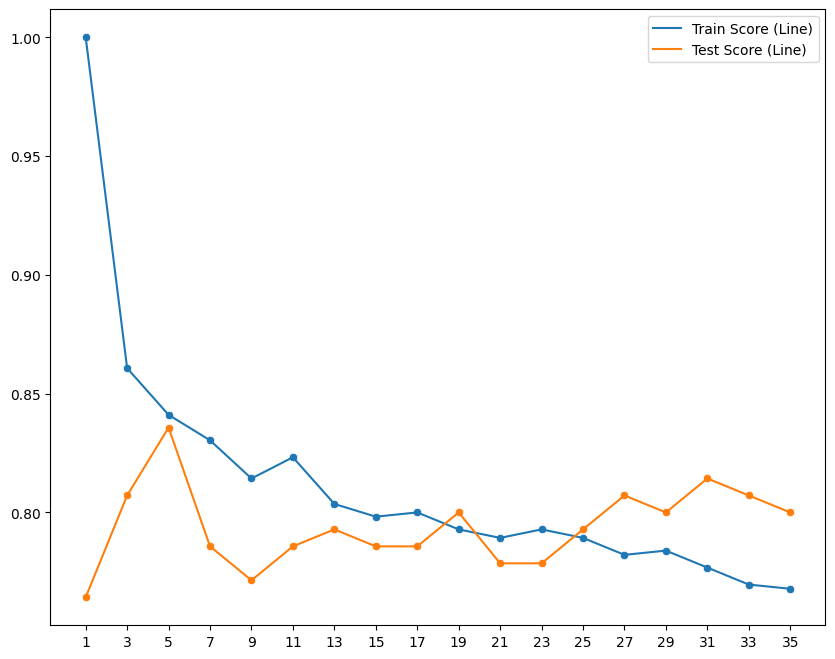

In [44]:
plt.figure(figsize=(10,8))

sns.lineplot(x=k, y=train_score, label='Train Score (Line)')
sns.scatterplot(x=k, y=train_score)

sns.lineplot(x=k, y=test_score, label='Test Score (Line)')
sns.scatterplot(x=k, y=test_score)

plt.legend()
plt.xticks(k)

plt.show()